In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 1.97G/1.98G [00:14<00:00, 90.4MB/s]
100% 1.98G/1.98G [00:14<00:00, 148MB/s] 


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/fruit-and-vegetable-image-recognition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

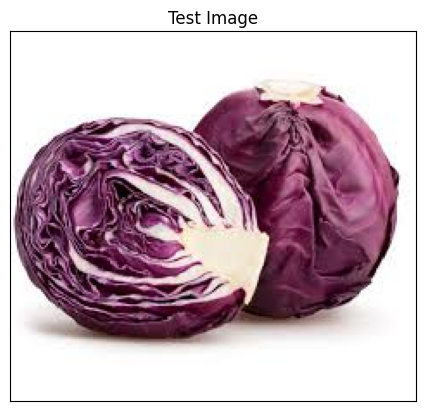

In [63]:
import cv2
image_path = '/content/red.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [64]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 29ms/step


In [65]:
result_index = np.argmax(predictions)
print(result_index)

26


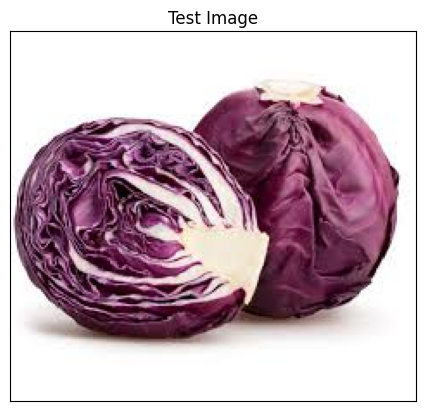

In [66]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [67]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a pomegranate
